In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt      
import seaborn as sns                
import plotly.express as px          

# Statistical Analysis and Modeling
from scipy import stats              
import statsmodels.api as sm

In [3]:
df = pd.read_csv("/mnt/d/SalaryPredictionDataScientists/SalariesData/DataScience_salaries_2024.csv")

In [4]:
print(df.head())          
print(df.info())          
print(df.describe())      

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

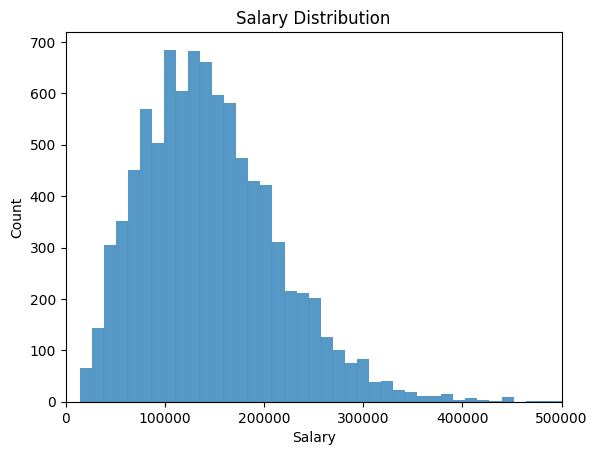

Min Salary: 14000
Max Salary: 30400000


In [7]:
# Plot the histogram and set x-axis limits
sns.histplot(df['salary'], bins=2500)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.xlim(0, 500000)  # Limit x-axis to the range 0 to 300,000
plt.show()

print("Min Salary:", df['salary'].min())
print("Max Salary:", df['salary'].max())

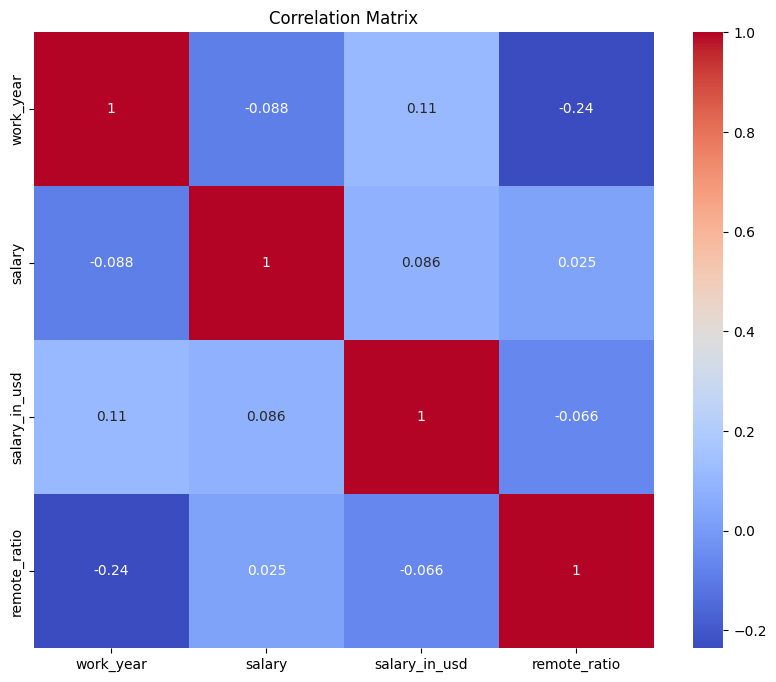

In [13]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

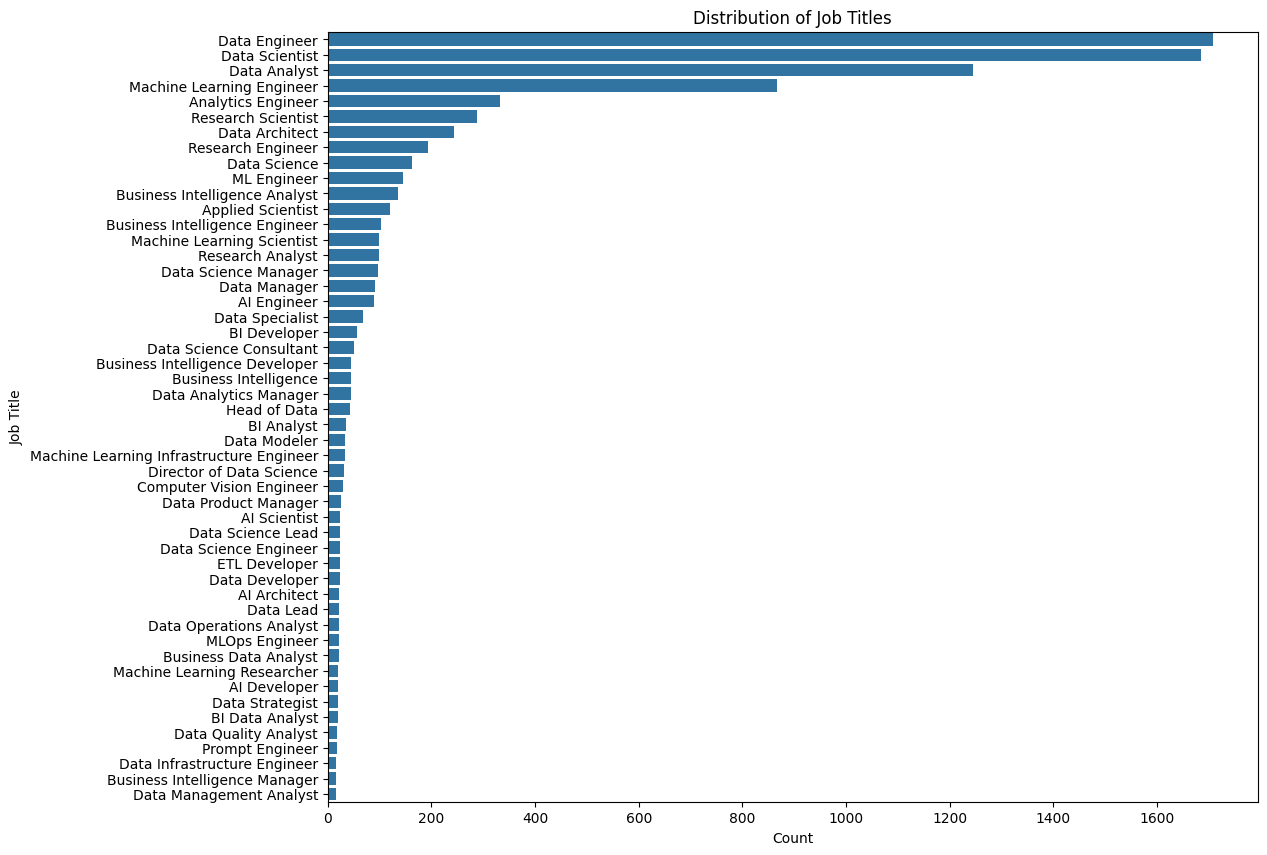

In [17]:
plt.figure(figsize=(12, 10))  # Increase height to allow more space for labels

# Plot only the top 10 most common job titles for clarity
sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index[:50])

plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Adjust font size for y-tick labels
plt.yticks(fontsize=10)

plt.show()


In [18]:
df = pd.get_dummies(df, columns=['experience_level', 'employment_type'])


In [22]:
# Check the count of each experience level
print(df['experience_level'].value_counts())


experience_level
SE    5414
MI    2466
EN     893
EX     354
Name: count, dtype: int64


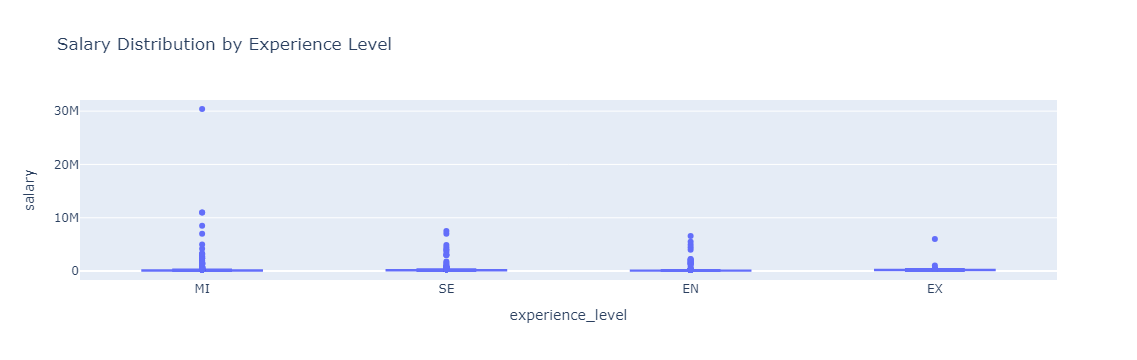

In [23]:
# Filter out experience levels with fewer than a certain threshold (e.g., 5 samples)
threshold = 5
filtered_df = df[df['experience_level'].map(df['experience_level'].value_counts()) >= threshold]

# Re-create the plot with the filtered data
fig = px.box(filtered_df, x="experience_level", y="salary", title="Salary Distribution by Experience Level")
fig.show()


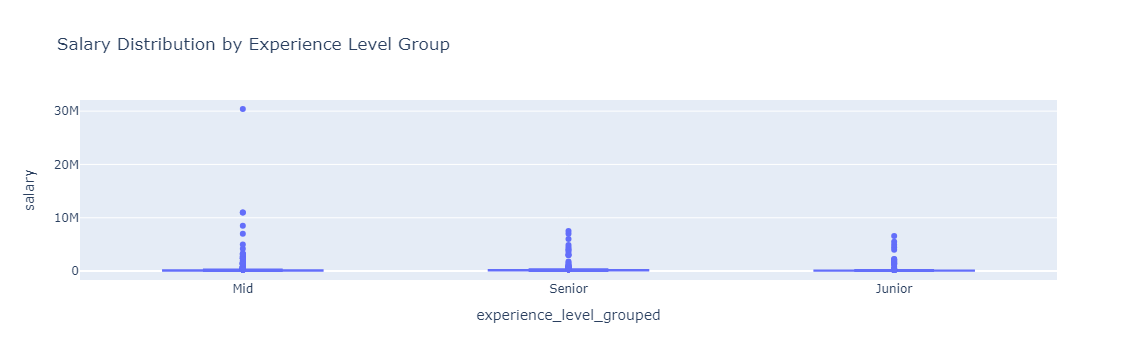

In [24]:
# For instance, combining experience levels into fewer categories
df['experience_level_grouped'] = df['experience_level'].replace({
    'EN': 'Junior', 
    'MI': 'Mid', 
    'SE': 'Senior', 
    'EX': 'Senior'
})

# Plot using the combined groups
fig = px.box(df, x="experience_level_grouped", y="salary", title="Salary Distribution by Experience Level Group")
fig.show()


In [26]:
# Check the size of the dataset
print(f"Dataset size: {df.shape}")

# Drop rows with NaN values in relevant columns, if any
df = df.dropna(subset=['experience_level', 'salary'])


Dataset size: (9127, 19)


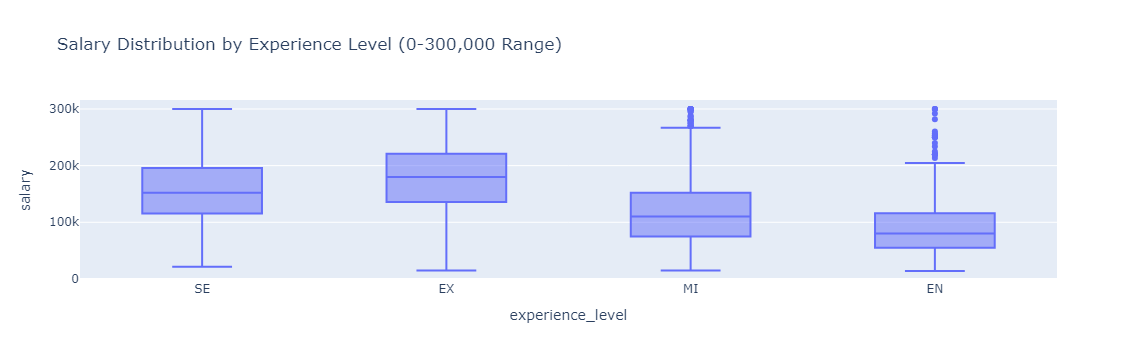

In [27]:
# Focus on a typical range of salaries
filtered_df = df[(df['salary'] >= 0) & (df['salary'] <= 300000)]

# Plot using Plotly
fig = px.box(filtered_df, x="experience_level", y="salary", title="Salary Distribution by Experience Level (0-300,000 Range)")
fig.show()

                   count           mean            std      min       25%  \
experience_level                                                            
EN                 893.0  139405.365062  424658.133111  14000.0   55000.0   
EX                 354.0  212670.124294  320363.411598  15000.0  144655.0   
MI                2466.0  175105.087186  759670.127837  15000.0   77000.0   
SE                5414.0  172597.036202  210173.477032  21600.0  117000.0   

                       50%       75%         max  
experience_level                                  
EN                 82800.0  120000.0   6600000.0  
EX                191178.5  235750.0   6000000.0  
MI                113000.0  158000.0  30400000.0  
SE                155000.0  200800.0   7500000.0  


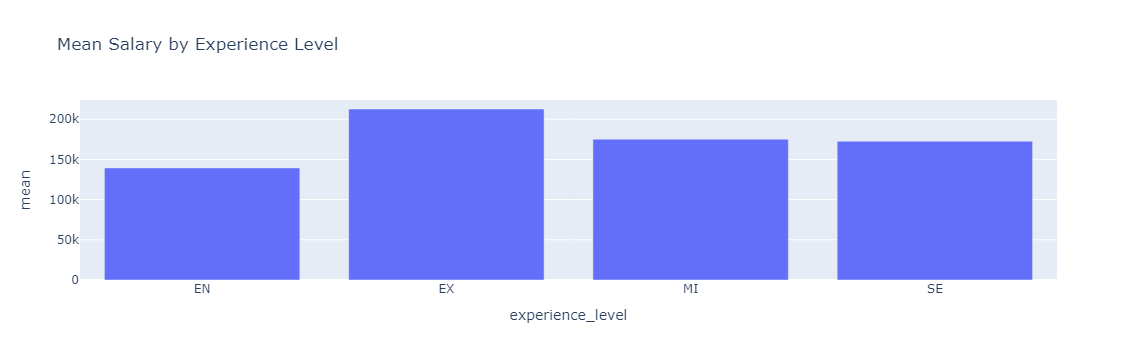

In [28]:
# Calculate summary statistics by experience level
salary_summary = df.groupby('experience_level')['salary'].describe()
print(salary_summary)

# Optionally, plot mean salary by experience level
fig = px.bar(salary_summary, x=salary_summary.index, y="mean", title="Mean Salary by Experience Level")
fig.show()


In [25]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df[df['experience_level'] == 'Senior']['salary'], 
                            df[df['experience_level'] == 'Entry']['salary'])
print("T-test:", t_stat, "P-value:", p_value)


T-test: nan P-value: nan


/tmp/ipykernel_635/3014779813.py:2: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

